In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv("healthcare_dataset.csv")

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [5]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [6]:
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [7]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [8]:
df.isna().sum().sort_values(ascending = False)

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [9]:
missing_values = df.isnull().sum()
missing_values_percentage = (missing_values / len(df)) * 100
missing_values_percentage

Name                  0.0
Age                   0.0
Gender                0.0
Blood Type            0.0
Medical Condition     0.0
Date of Admission     0.0
Doctor                0.0
Hospital              0.0
Insurance Provider    0.0
Billing Amount        0.0
Room Number           0.0
Admission Type        0.0
Discharge Date        0.0
Medication            0.0
Test Results          0.0
dtype: float64

In [11]:
import pandas as pd
# Средний биллинг
avg_billing_by_condition = df.groupby('Medical Condition')['Billing Amount'].mean()
print("Средний биллинг по медицинским условиям:")
print(avg_billing_by_condition)
# Количество пациентов по больницам
hospital_patients = df.groupby('Hospital')['Name'].count()
print("\nКоличество пациентов по больницам:")
print(hospital_patients)
# Рассчитываем продолжительность госпитализации
df['Stay Duration'] = (pd.to_datetime(df['Discharge Date']) - pd.to_datetime(df['Date of Admission'])).dt.days
# Средняя длительность госпитализации
avg_stay_duration = df['Stay Duration'].mean()
print(f"\nСредняя длительность госпитализации: {avg_stay_duration} дней")
# Общая сумма биллинга по страховым компаниям
total_billing_by_insurance = df.groupby('Insurance Provider')['Billing Amount'].sum()
print("\nОбщая сумма биллинга по страховым компаниям:")
print(total_billing_by_insurance)
# Средний возраст пациентов по врачам
avg_age_by_doctor = df.groupby('Doctor')['Age'].mean()
print("\nСредний возраст пациентов по врачам:")
print(avg_age_by_doctor)



Средний биллинг по медицинским условиям:
Medical Condition
Arthritis       25497.327056
Asthma          25635.249359
Cancer          25161.792707
Diabetes        25638.405577
Hypertension    25497.095761
Obesity         25805.971259
Name: Billing Amount, dtype: float64

Количество пациентов по больницам:
Hospital
Abbott Inc                       1
Abbott Ltd                       1
Abbott Moore and Williams,       1
Abbott and Thompson, Sullivan    1
Abbott, Peters and Hoffman       2
                                ..
and Zimmerman Sons               1
and Zuniga Davis Carlson,        1
and Zuniga Francis Peterson,     1
and Zuniga Sons                  1
and Zuniga Thompson, Blake       1
Name: Name, Length: 39876, dtype: int64

Средняя длительность госпитализации: 15.50900900900901 дней

Общая сумма биллинга по страховым компаниям:
Insurance Provider
Aetna               2.788631e+08
Blue Cross          2.832543e+08
Cigna               2.871393e+08
Medicare            2.857208e+08
Un

In [12]:
# Средняя длительность госпитализации (разница между датой поступления и выписки)
df['Stay Duration'] = (pd.to_datetime(df['Discharge Date']) - pd.to_datetime(df['Date of Admission'])).dt.days
avg_stay_duration = df['Stay Duration'].mean()
print(f"Средняя длительность госпитализации: {avg_stay_duration} дней")

Средняя длительность госпитализации: 15.50900900900901 дней


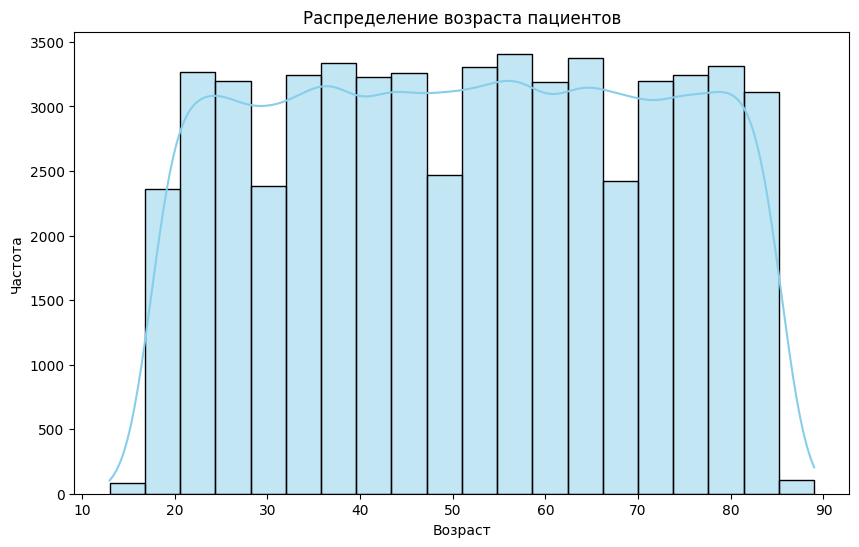

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Распределение возраста пациентов')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()


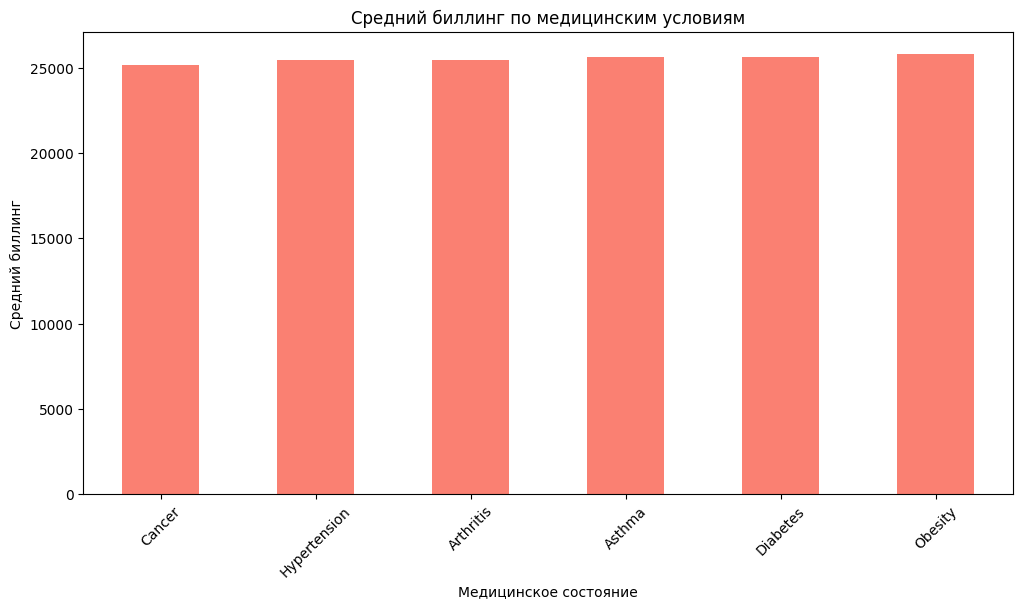

In [14]:
plt.figure(figsize=(12, 6))
avg_billing_by_condition.sort_values().plot(kind='bar', color='salmon')
plt.title('Средний биллинг по медицинским условиям')
plt.xlabel('Медицинское состояние')
plt.ylabel('Средний биллинг')
plt.xticks(rotation=45)
plt.show()


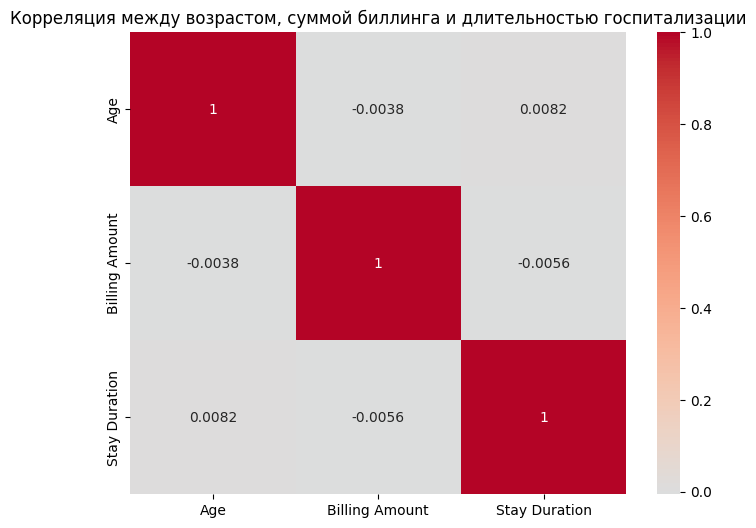

In [15]:
# Вычисление корреляционной матрицы
correlation_matrix = df[['Age', 'Billing Amount', 'Stay Duration']].corr()

# Визуализация тепловой карты
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Корреляция между возрастом, суммой биллинга и длительностью госпитализации')
plt.show()


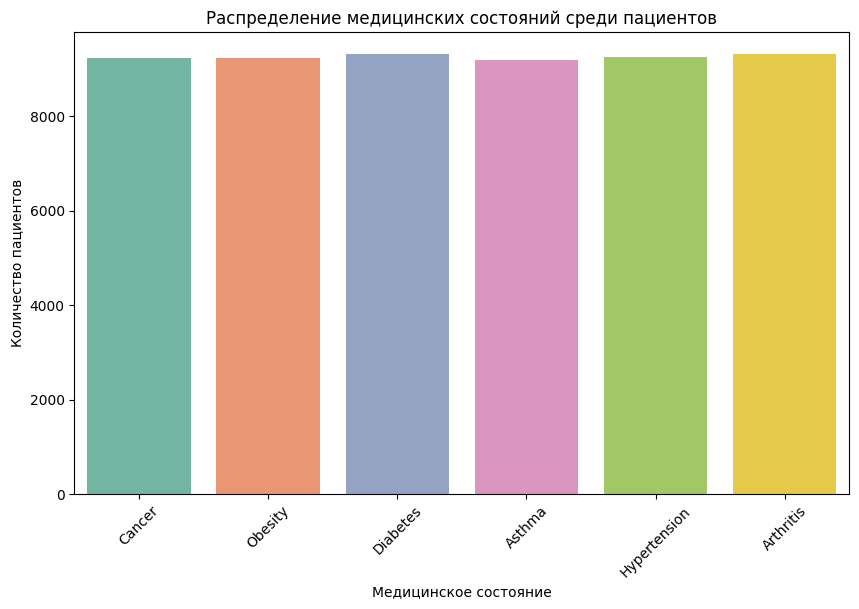

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Medical Condition', palette='Set2')
plt.title('Распределение медицинских состояний среди пациентов')
plt.xlabel('Медицинское состояние')
plt.ylabel('Количество пациентов')
plt.xticks(rotation=45)
plt.show()


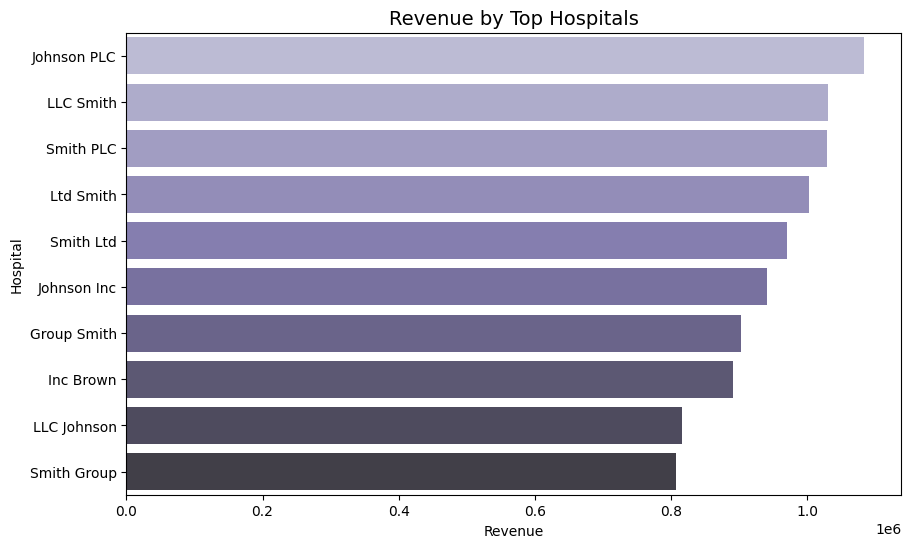

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
# Группировка по больницам и суммирование Billing Amount
top_hospitals_revenue_sorted = df.groupby('Hospital')['Billing Amount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_hospitals_revenue_sorted.values, y=top_hospitals_revenue_sorted.index, palette="Purples_d")
plt.title("Revenue by Top Hospitals", fontsize=14)
plt.xlabel("Revenue")
plt.ylabel("Hospital")
plt.show()


In [18]:
# Получение всех пациентов с состоянием "Obesity"
obesity_patients = df[df['Medical Condition'] == 'Obesity']
print(f"Пациенты с ожирением: {obesity_patients[['Name', 'Age', 'Medical Condition']]}")


Пациенты с ожирением:                       Name  Age Medical Condition
1             LesLie TErRy   62           Obesity
2              DaNnY sMitH   76           Obesity
15      MS. nAtalIE gAMble   46           Obesity
17     mRS. jamiE cAMPBELl   38           Obesity
25        PeTER fiTzgeRaLd   73           Obesity
...                    ...  ...               ...
55476     ElIzabETH mORRIs   31           Obesity
55481      deboRaH pEARsOn   34           Obesity
55488        briTtNeY York   43           Obesity
55491        lInDA grIFfin   47           Obesity
55496           KYle pEREz   61           Obesity

[9231 rows x 3 columns]


In [19]:
long_stay_patients = df[df['Stay Duration'] > 10]
print(f"Пациенты с длительностью госпитализации более 10 дней:\n{long_stay_patients[['Name', 'Stay Duration']]}")

Пациенты с длительностью госпитализации более 10 дней:
                    Name  Stay Duration
2            DaNnY sMitH             15
3           andrEw waTtS             30
4          adrIENNE bEll             20
6         edwArD EDWaRDs             12
8        JASmINe aGuIlaR             13
...                  ...            ...
55493       gLoRIA BOWen             26
55494      JEssIcA WHiTe             24
55495  eLIZABeTH jaCkSOn             30
55497       HEATher WaNG             28
55499       jAMES GARCiA             27

[37016 rows x 2 columns]


In [20]:
avg_billing_by_doctor = df.groupby('Doctor')['Billing Amount'].mean()
print(f"Средний биллинг по врачам:\n{avg_billing_by_doctor}")


Средний биллинг по врачам:
Doctor
Aaron Acevedo      29047.276881
Aaron Adams        20162.255454
Aaron Aguilar       8091.811551
Aaron Alexander    22120.865185
Aaron Anderson     40326.058137
                       ...     
Zoe Khan           25569.200623
Zoe Knight         33600.996647
Zoe Nichols        34217.903828
Zoe Roberts        38594.424820
Zoe Wallace        22018.470927
Name: Billing Amount, Length: 40341, dtype: float64


In [22]:
# Заполнение пропусков в возрасте
df['Age'].fillna(df['Age'].mean(), inplace=True)
# Удаление строк с пропущенными значениями в столбце 'Age'
df = df.dropna(subset=['Age'])
# Преобразование столбца 'Age' в числовой формат
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
bins = [0, 18, 30, 40, 50, 60, 100]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '60+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
print(df[['Age', 'Age Group']].head())


   Age Age Group
0   30     31-40
1   62       60+
2   76       60+
3   28     19-30
4   43     41-50


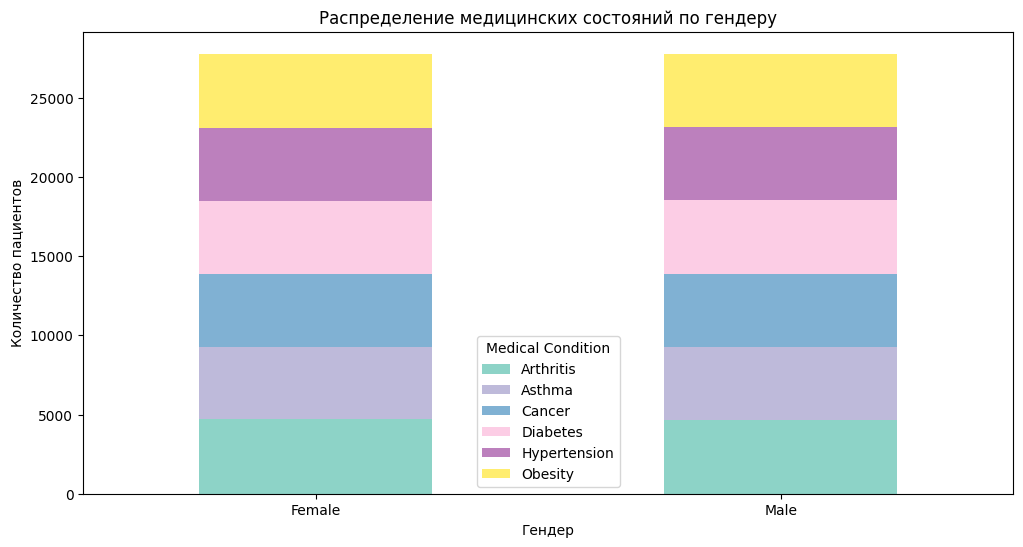

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
gender_condition_dist = df.groupby(['Gender', 'Medical Condition']).size().unstack().fillna(0)
gender_condition_dist.plot(kind='bar', stacked=True, colormap='Set3', figsize=(12, 6))
plt.title('Распределение медицинских состояний по гендеру')
plt.xlabel('Гендер')
plt.ylabel('Количество пациентов')
plt.xticks(rotation=0)
plt.show()

Insurance Provider
Cigna               11249
Medicare            11154
UnitedHealthcare    11125
Blue Cross          11059
Aetna               10913
Name: count, dtype: int64


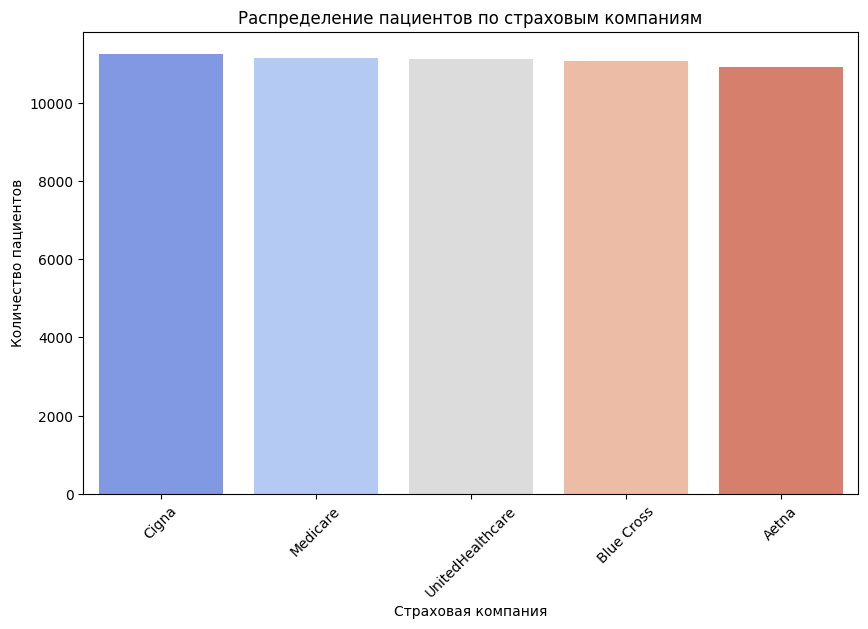

In [26]:
insurance_dist = df['Insurance Provider'].value_counts()
print(insurance_dist)
plt.figure(figsize=(10, 6))
sns.barplot(x=insurance_dist.index, y=insurance_dist.values, palette="coolwarm")
plt.title('Распределение пациентов по страховым компаниям')
plt.xlabel('Страховая компания')
plt.ylabel('Количество пациентов')
plt.xticks(rotation=45)
plt.show()


In [28]:
avg_billing_by_admission_type = df.groupby('Admission Type')['Billing Amount'].mean()
print("Средний биллинг по типу госпитализации:")
print(avg_billing_by_admission_type)


Средний биллинг по типу госпитализации:
Admission Type
Elective     25602.226311
Emergency    25497.397157
Urgent       25517.364497
Name: Billing Amount, dtype: float64


In [29]:
patients_by_doctor = df.groupby('Doctor')['Name'].count()
print("Количество пациентов по врачам:")
print(patients_by_doctor)


Количество пациентов по врачам:
Doctor
Aaron Acevedo      1
Aaron Adams        1
Aaron Aguilar      1
Aaron Alexander    1
Aaron Anderson     1
                  ..
Zoe Khan           1
Zoe Knight         1
Zoe Nichols        1
Zoe Roberts        1
Zoe Wallace        1
Name: Name, Length: 40341, dtype: int64
